In [1]:
import sys
sys.path.insert(0, '../code/')
from dismod_db import DismodDB
from two_level import TwoLevel
from plot_two_level import PlotTwoLevel
import numpy as np
import pandas as pd

#### Build database

In [2]:
data = pd.read_csv('./data/diabetes_sinc_1000_loc.csv')

integrand = ['Sincidence']
locations = ['Australia', 'New Zealand']
rates = ['iota']
#meas_noise_density = {'Sincidence':{'density':'students', 'nu': 30}}
meas_noise_density = {'Sincidence': {'density': 'gaussian'}}
rates_parent_priors = [
    # rate priors for iota
    ({'density':'uniform','upper':1.0,'lower':1e-16,'mean': .0001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .0001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .0001})]
rates_child_priors = [
    # rate priors for iota
    ({'density':'gaussian','mean': 0.0, 'std': .1},\
    {'density': 'gaussian', 'mean':0.0, 'std': .1},\
    {'density': 'gaussian', 'mean':0.0, 'std': .1})]
#---------change path------------
path = './data/incidence_two_level.db'

db = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density,path)

#### Train model

In [3]:
model = TwoLevel(db)

In [4]:
model.initialize()

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level.db init


In [5]:
model.fit_both(zero_sum=True, tol=1e-10)

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level.db init
./data/incidence_two_level.db fit fixed
./data/incidence_two_level.db set start_var fit_var
./data/incidence_two_level.db fit both
./data/incidence_two_level.db predict fit_var


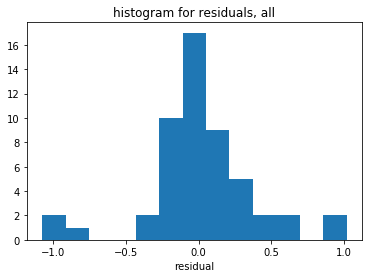

In [6]:
path = './data/'
plt = PlotTwoLevel(path, 'incidence_two_level.db')
plt.plot_residuals('all')

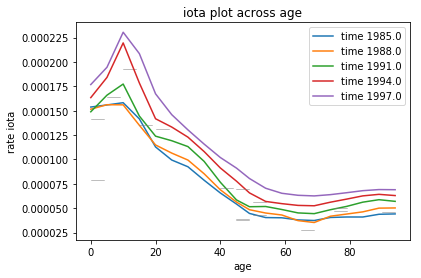

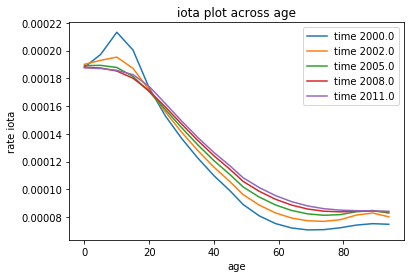

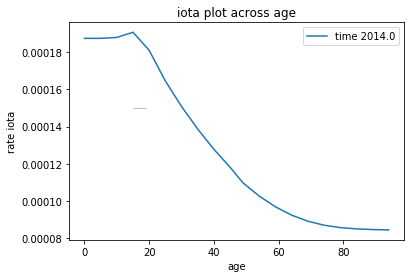

In [7]:
plt.plot_change_over_age('rate', 'iota', 'Sincidence', 'Australia')

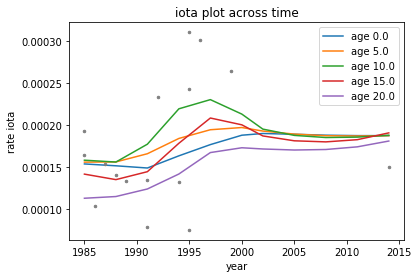

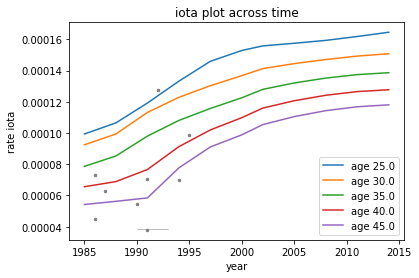

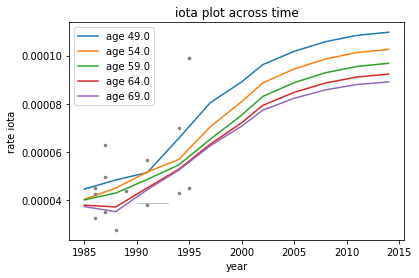

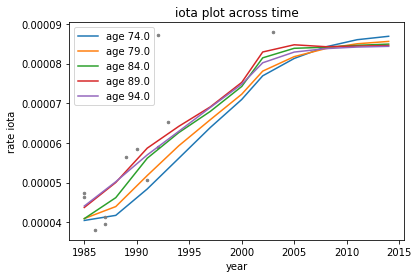

In [8]:
plt.plot_change_over_time('rate', 'iota', 'Sincidence', 'Australia')

#### Use students t

In [9]:
data = pd.read_csv('./data/diabetes_sinc_1000_loc.csv')
path2 = './data/incidence_two_level_st.db'
meas_noise_density2 = {'Sincidence':{'density':'students', 'nu': 10}}
db2 = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density2,path2)

In [10]:
model2 = TwoLevel(db2)

In [11]:
model2.initialize()

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_st.db init


In [12]:
model2.fit_both(zero_sum=True, fit_gaussian=True, tol=1e-10, db2csv=True)

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_st.db init
./data/incidence_two_level_st.db fit fixed
./data/incidence_two_level_st.db set start_var fit_var
/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_st.db init
./data/incidence_two_level_st.db fit both
./data/incidence_two_level_st.db predict fit_var


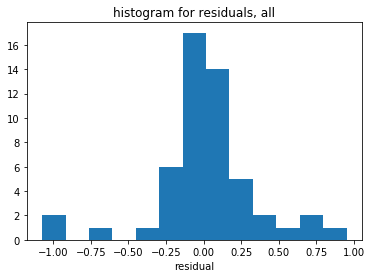

In [13]:
path = './data/'
plt = PlotTwoLevel(path, 'incidence_two_level_st.db')
plt.plot_residuals('all')

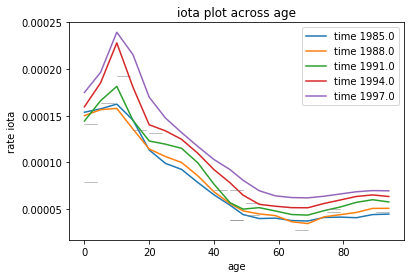

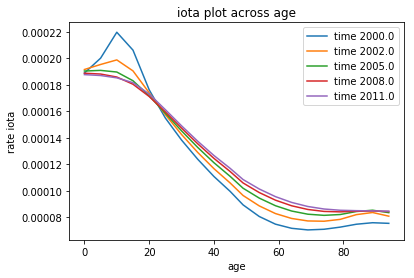

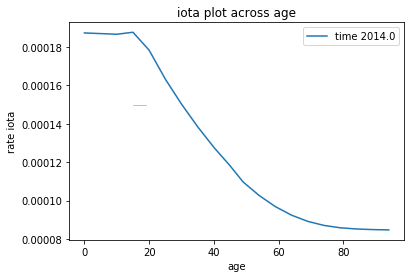

In [14]:
plt.plot_change_over_age('rate', 'iota', 'Sincidence', 'Australia')

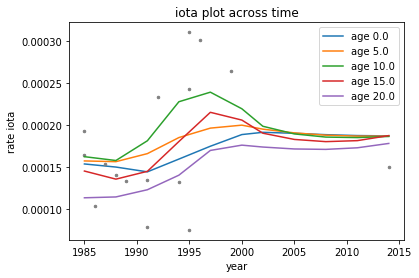

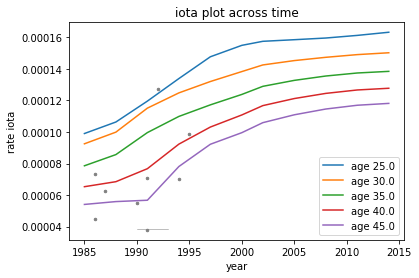

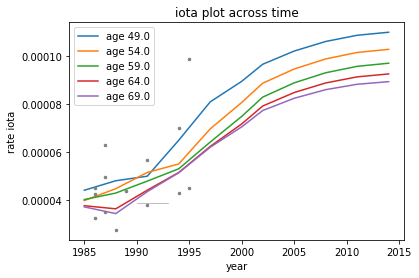

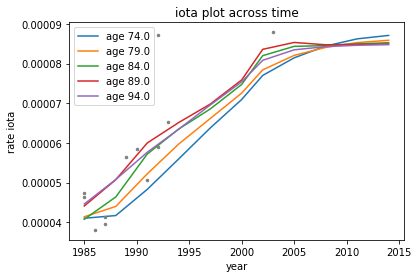

In [15]:
plt.plot_change_over_time('rate', 'iota', 'Sincidence', 'Australia')